# Salary : Analytics and Forecast

In [1]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('ggplot')

In [2]:
file = 'Salary_Data_Based_country_and_race.csv'

In [3]:
df = pd.read_csv(file)
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [4]:
df2 = df.drop(columns=['Unnamed: 0'],axis=1)
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [6]:
df2.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

Null Values in total for each rows is less than 25% of the data. Therefore deleting null rows is Likely Possible

In [7]:
df2.dropna(inplace=True)

In [8]:
df2.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [9]:
df2.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race'],
      dtype='object')

In [10]:
df2.Race.unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

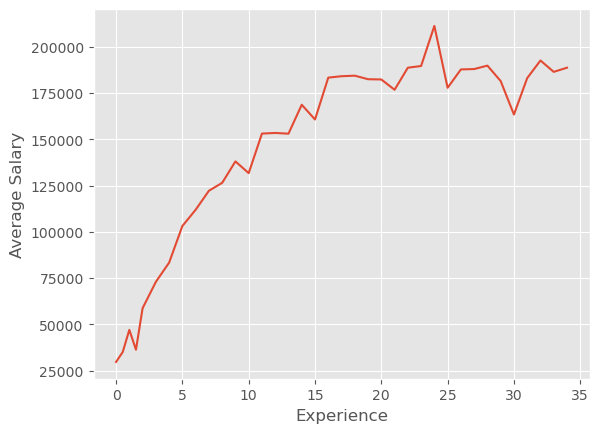

In [11]:
salary_ByExp = df2.groupby('Years of Experience')['Salary'].mean()
plt.xlabel('Experience')
plt.ylabel('Average Salary')
plt.plot(salary_ByExp)
plt.show()

In [13]:
df2['Years of Experience'].nunique()

37

In [37]:
# Apparently average salary on 30 Years Experience is less than <30 Average let's see why

feats = ['Age','Gender','Education Level','Country','Salary','Race']

selected = df2[(df2["Years of Experience"] == 29) | (df2["Years of Experience"] == 30)]
selected
# exp30 = df2[df2['Years of Experience'] == 30]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
2387,57.0,Female,PhD,Full Stack Engineer,30.0,121450.0,Australia,Australian
2467,57.0,Female,PhD,Full Stack Engineer,30.0,121450.0,Canada,Black
2541,55.0,Female,PhD,Software Engineer Manager,30.0,183138.0,USA,African American
2543,54.0,Male,Bachelor's Degree,Senior Project Engineer,29.0,191915.0,Canada,Asian
2554,54.0,Other,High School,Senior Software Engineer,29.0,158254.0,China,White
2557,52.0,Female,PhD,Software Engineer Manager,29.0,194214.0,UK,White
2607,55.0,Female,Bachelor's Degree,Senior Project Engineer,30.0,183020.0,China,Chinese
2643,54.0,Male,Bachelor's Degree,Senior Software Engineer,30.0,186321.0,UK,Welsh
2787,55.0,Female,PhD,Software Engineer Manager,29.0,190543.0,UK,Welsh
2800,54.0,Other,High School,Senior Software Engineer,29.0,158966.0,Canada,Black


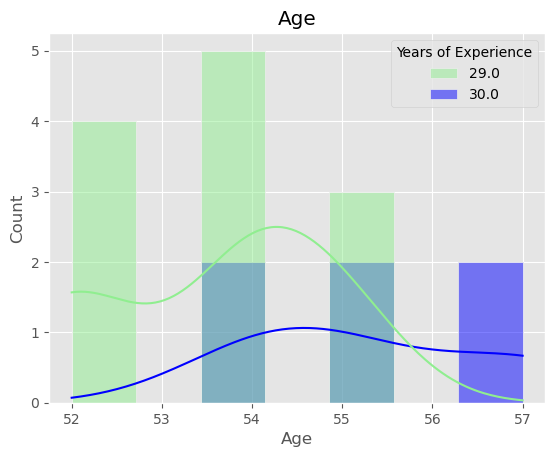

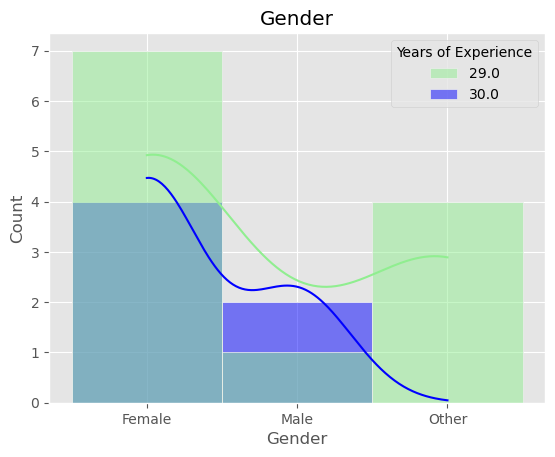

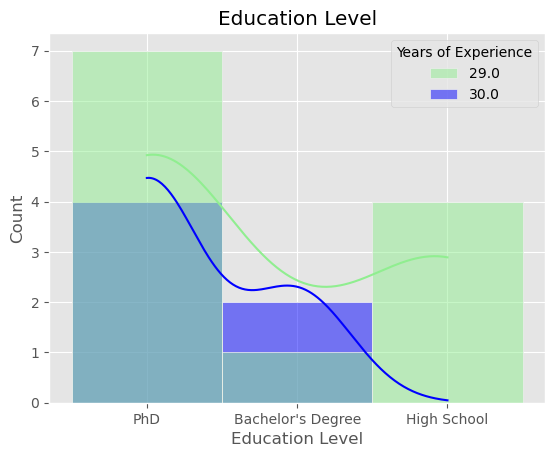

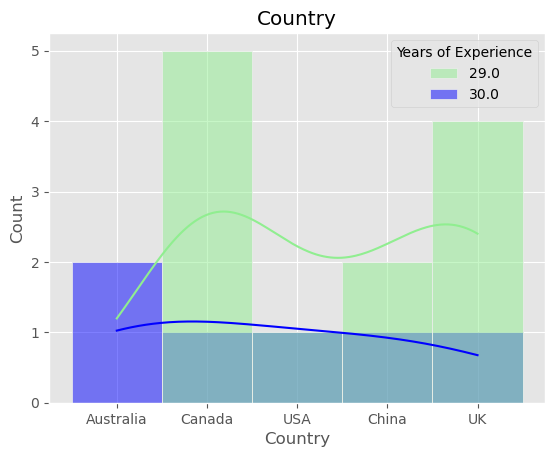

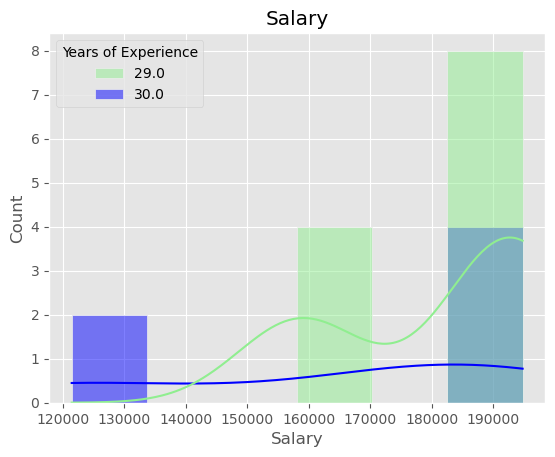

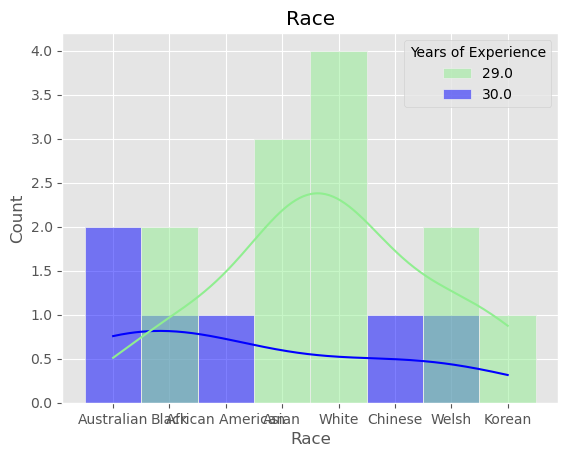

In [38]:
for cols in feats:
    sb.histplot(data = selected,x = selected[cols],kde=True, hue = 'Years of Experience',palette=['lightgreen', 'blue'])
    plt.title(cols)
    plt.show()

Based on graph above we know that at 30 years of experience there is no White and Asian. And there is a gap (little) in counts (29 Years has more numbers)

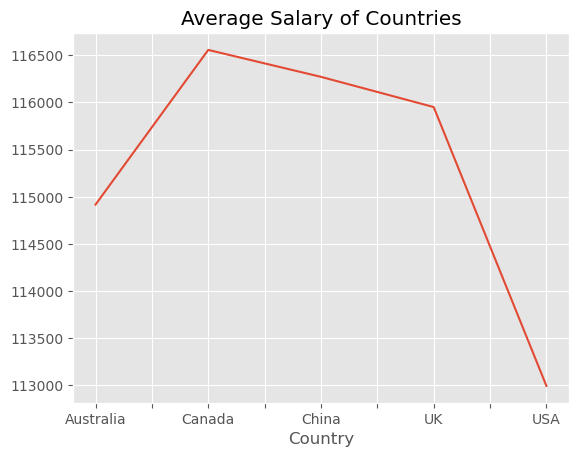

In [22]:
# but lets see on how average salary of each country 

df2.groupby('Country')['Salary'].mean().round(2).plot()
plt.title('Average Salary of Countries')
plt.show()

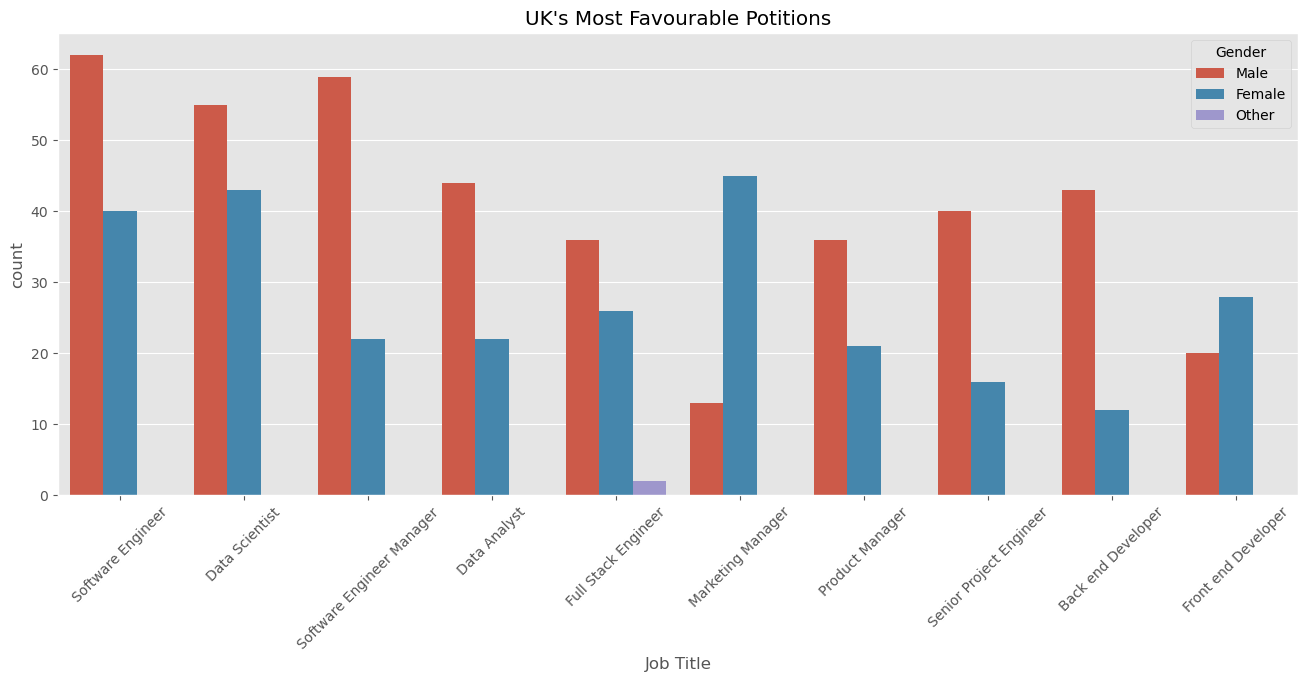

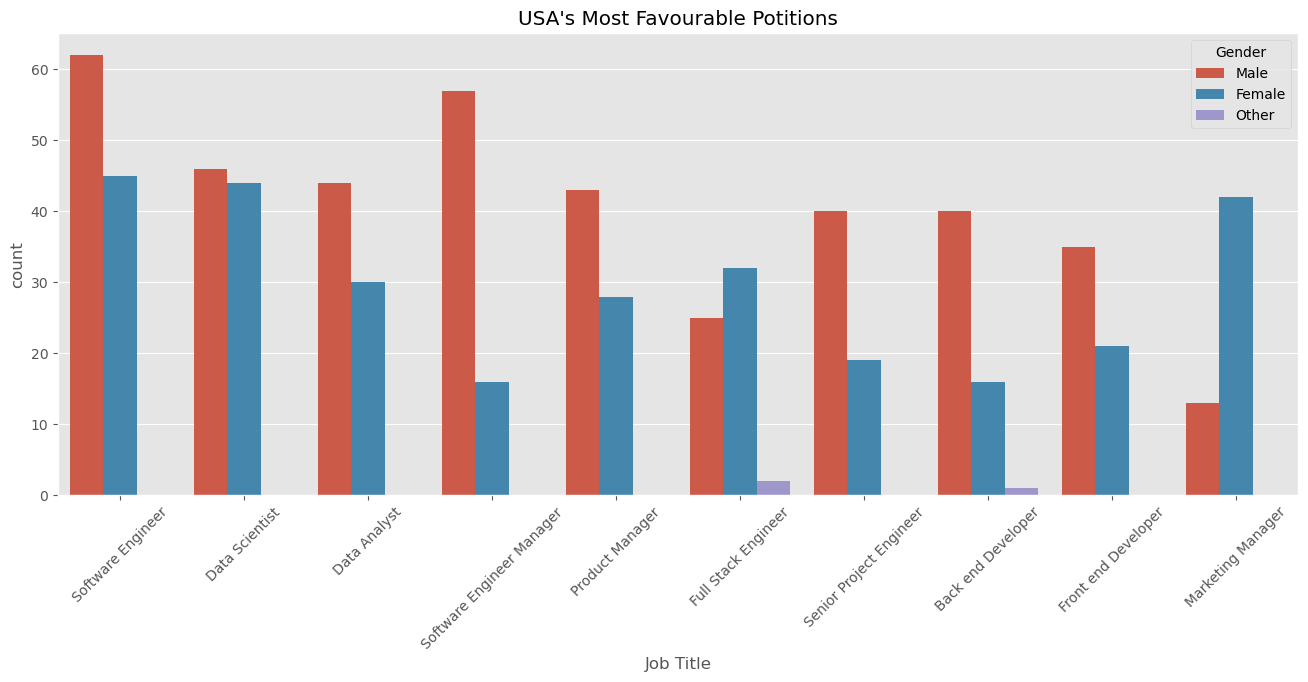

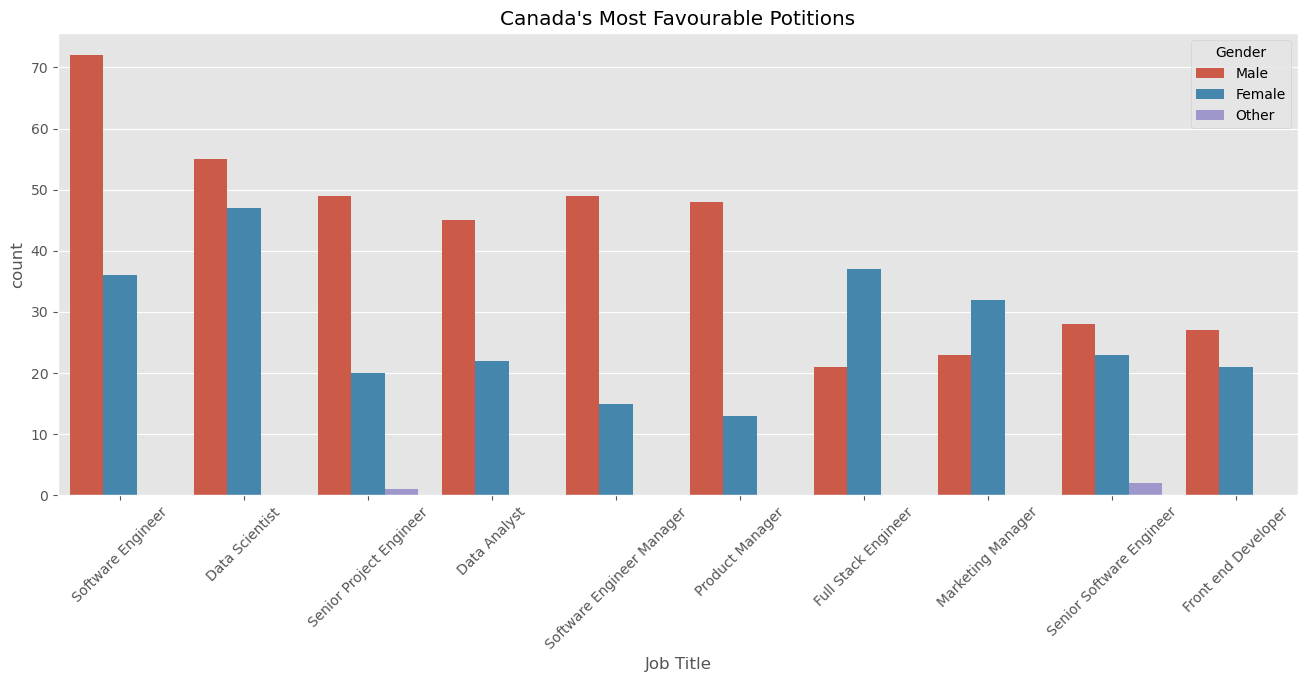

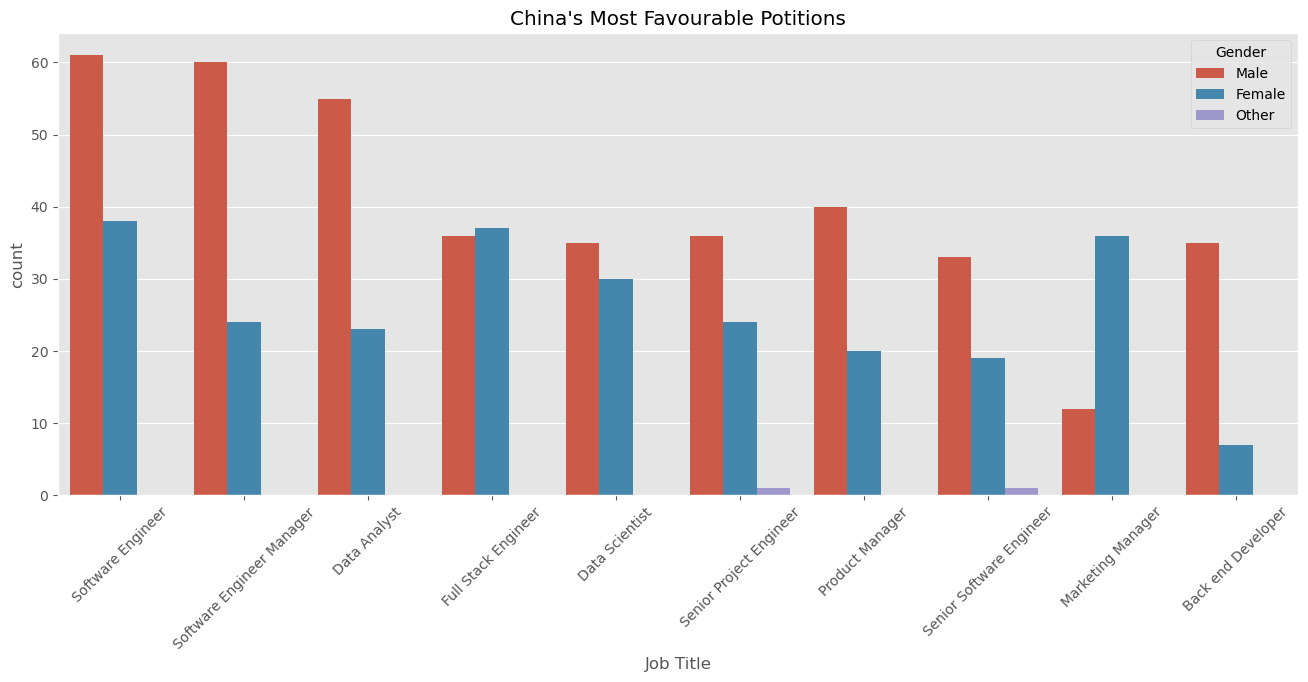

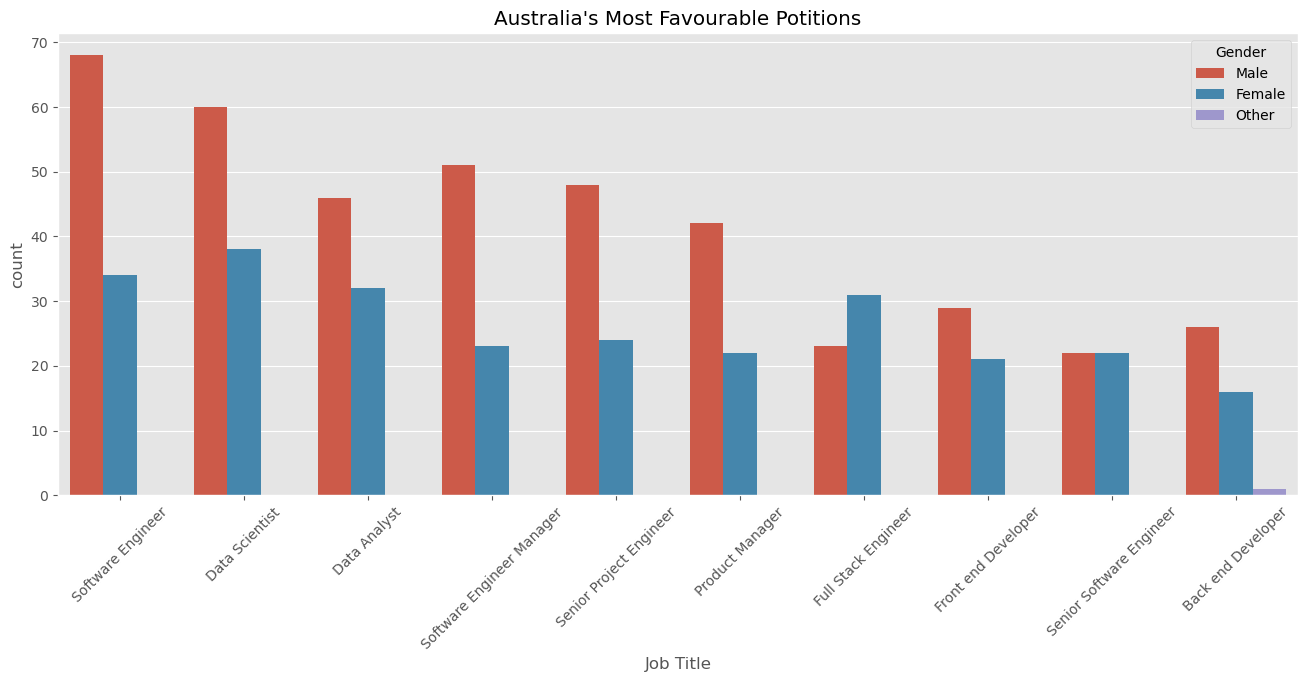

In [33]:
for countries in df2.Country.unique():
    plt.figure(figsize=(16,6))
    sb.countplot(data=df2[df2.Country == countries],x=df2[df2.Country == countries ]['Job Title'],hue=df2.Gender,  order=df2[df2.Country == countries ]['Job Title'].value_counts().iloc[:10].index)
    plt.xticks(rotation=45)
    plt.title(f"{countries}'s Most Favourable Potitions")
    plt.show()

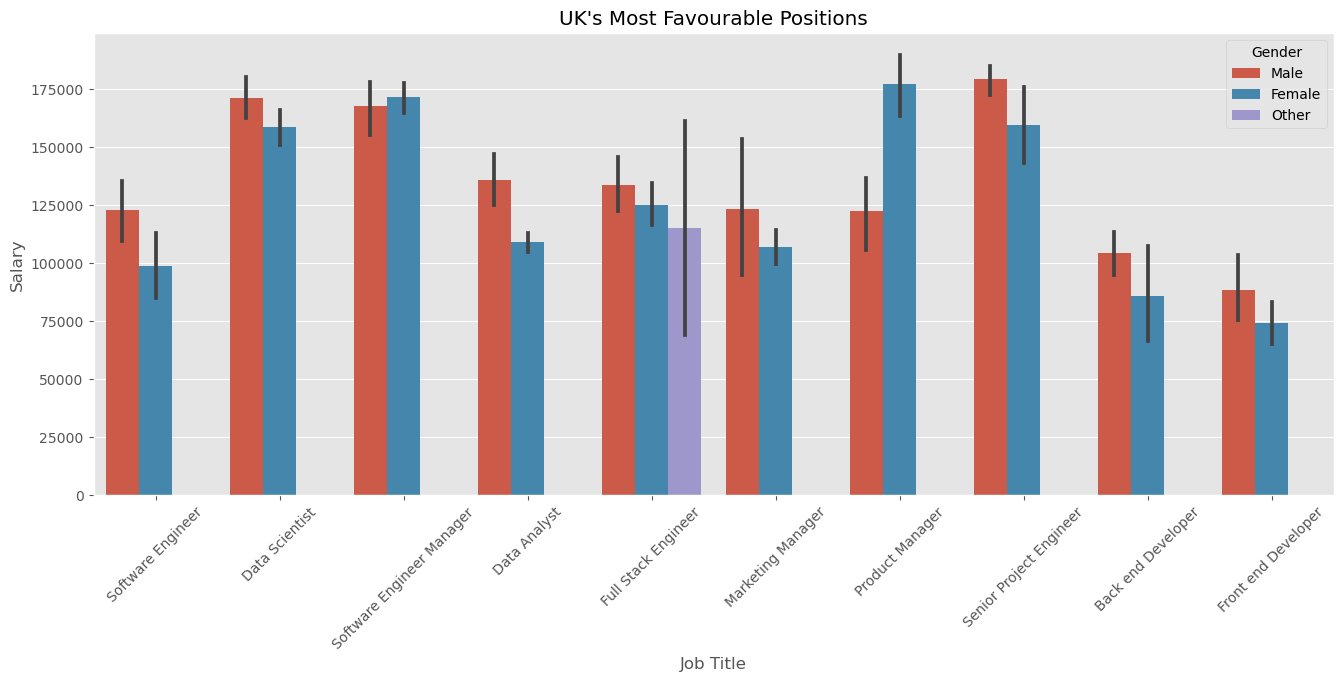

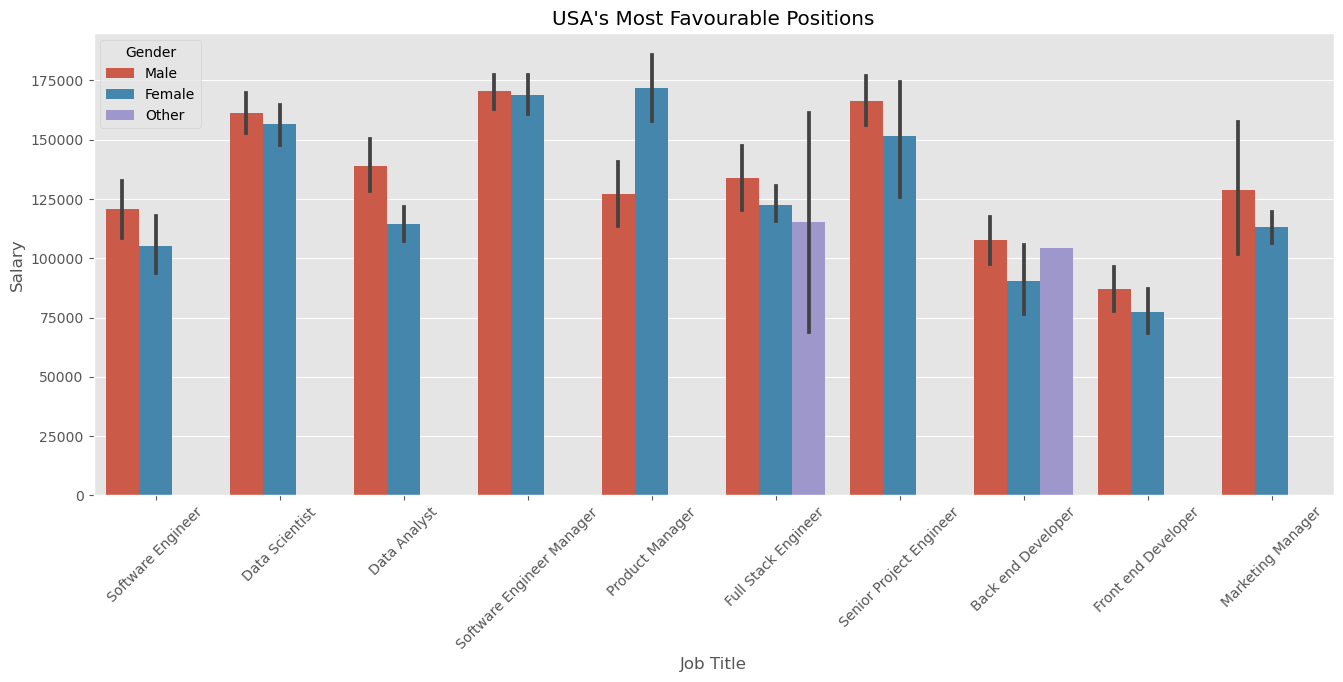

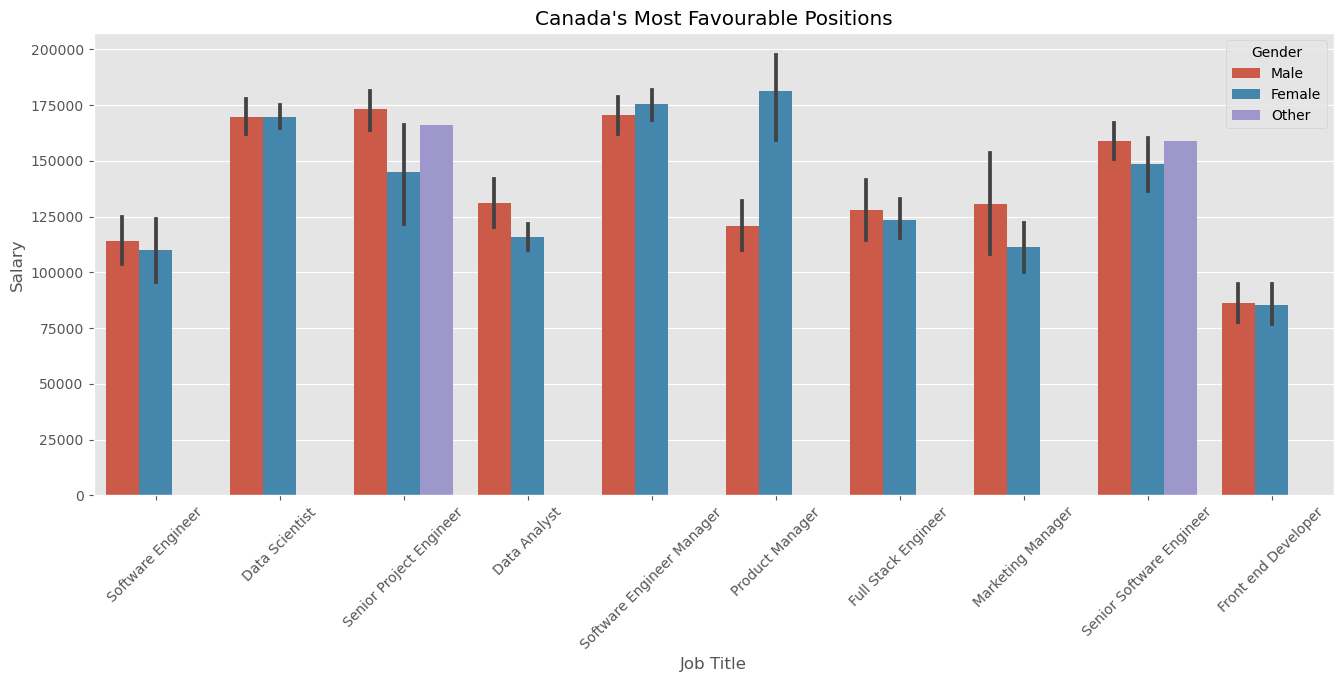

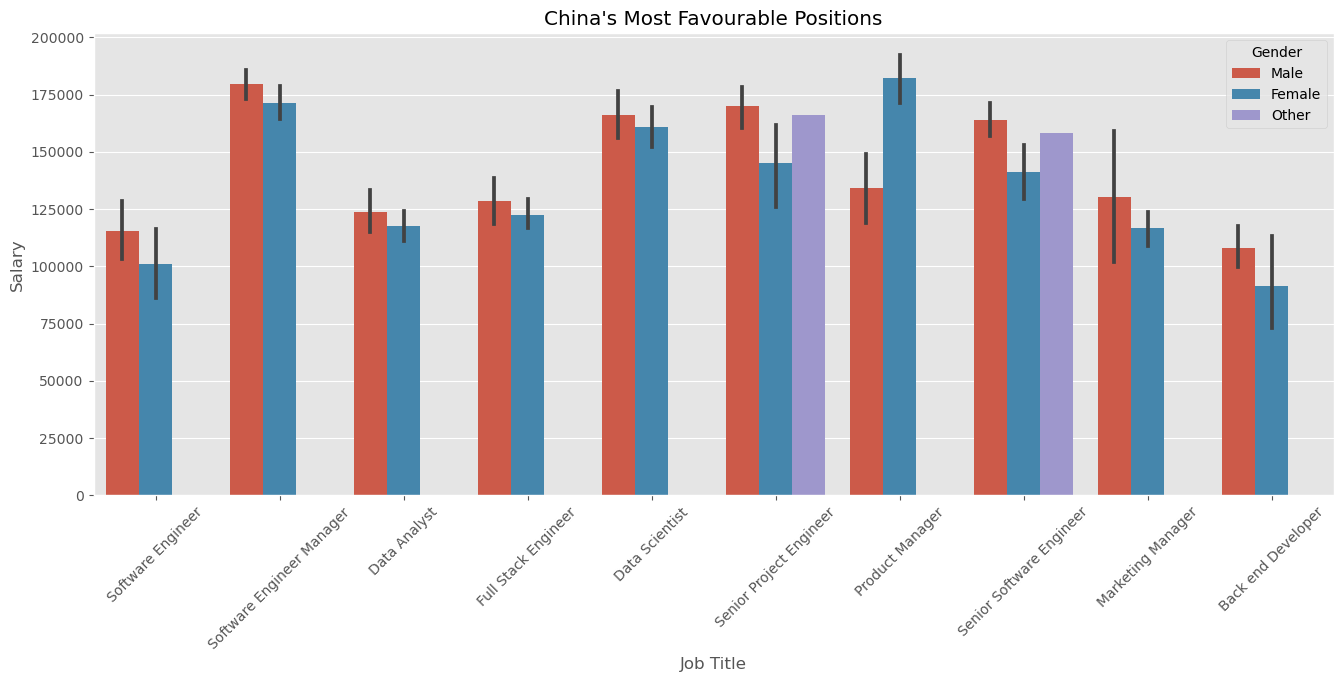

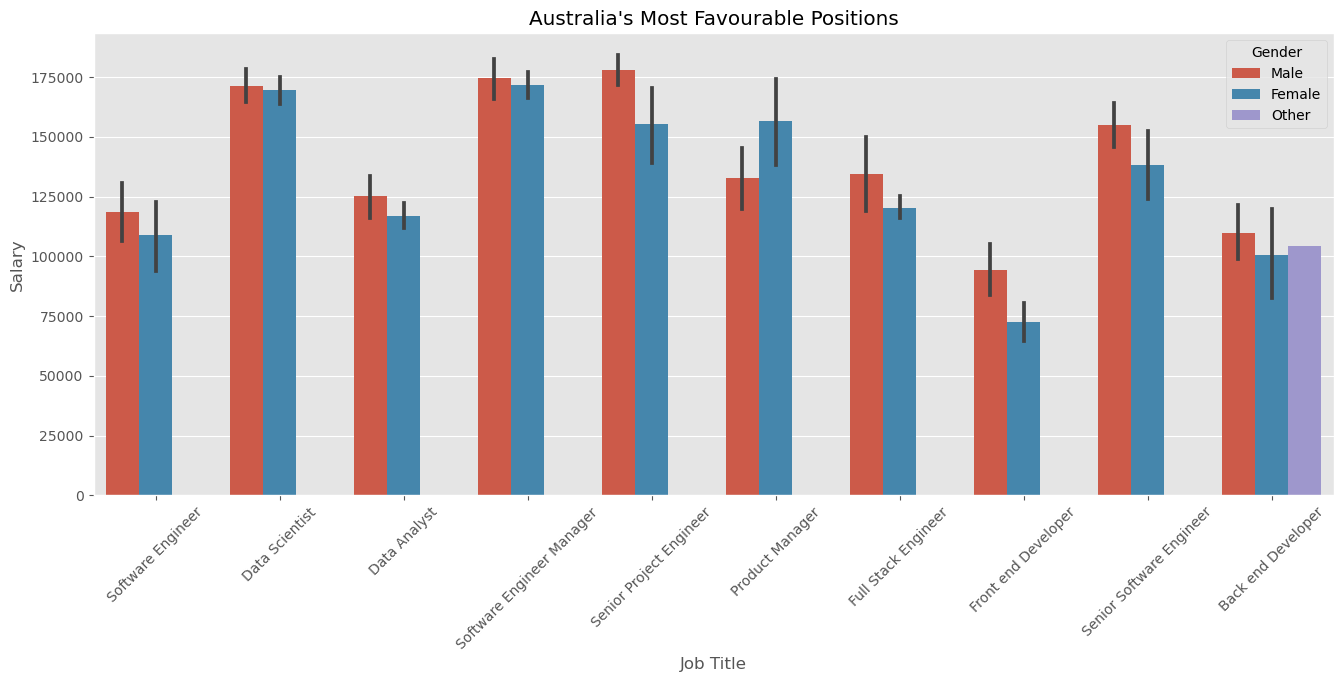

In [36]:
for countries in df2.Country.unique():
    plt.figure(figsize=(16,6))
    sb.barplot(data=df2[df2.Country == countries],x=df2[df2.Country == countries ]['Job Title'],y=df2[df2.Country == countries ]['Salary'],hue=df2.Gender,  order=df2[df2.Country == countries ]['Job Title'].value_counts().iloc[:10].index)
    plt.xticks(rotation=45)
    plt.title(f"{countries}'s Most Favourable Positions")
    plt.show()

Even Though Software Engineer is most favourable jobs position, its likely has less salary than most other favourable job positions

In [46]:
#Since everything looks good, lets start encoding
from sklearn.preprocessing import LabelEncoder
# Classification
data = df2

for cols in data.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(df2[cols])
    
    data[cols] = encoded_labels
    

data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,1,0,175,5.0,90000.0,3,9
1,28.0,0,3,18,3.0,65000.0,4,5
2,45.0,1,5,144,15.0,150000.0,1,9
3,36.0,0,0,115,7.0,60000.0,4,5
4,52.0,1,3,25,20.0,200000.0,4,1


In [40]:
#Since the output is likely Numerical (Salary) we could take regressor models | Lets try anyway
from sklearn.model_selection import train_test_split

#Regression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import median_absolute_error

In [41]:
ts = 0.3

In [48]:
X = data.drop('Salary',axis=1)
y = data.Salary

X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=ts,shuffle=False)

In [49]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(2,20)}

# Create a random forest classifier
rf = RandomForestRegressor(random_state=32)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist,  
                                 n_iter=15,
                                 cv=5,
                                 scoring='neg_mean_squared_error')

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_params = rand_search.best_params_
best_score = rand_search.best_score_

# Print the best hyperparameters
print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

Best Parameters: {'max_depth': 15, 'n_estimators': 63}
Best Mean Squared Error: -145959171.43538547


In [50]:
rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],max_depth=best_params['max_depth'], random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [51]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  25908.514854794095
Mean Squared Error Value is :  1177052676.7444413
Median Absolute Error Value is :  19603.1746031746


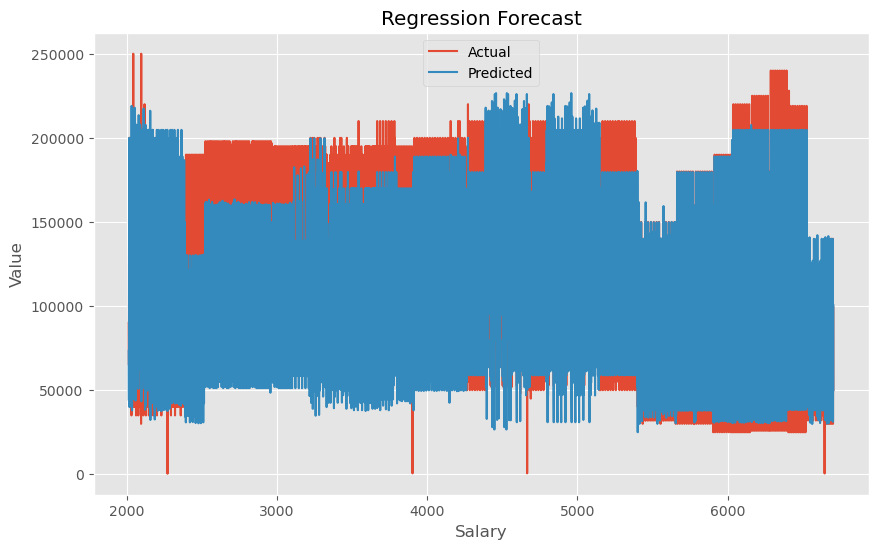

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Value')
plt.title(f'Regression Forecast')
plt.legend()
plt.show()

In [55]:
y_pred

array([ 73412.6984127 ,  43888.88888889, 150000.        , ...,
        31222.22222222, 101111.11111111,  50079.36507937])

In [66]:
inputs = [
    20,0,5,18,1,4,1
]

rf_model.predict([inputs]).round(2)

c:\Users\intel\anaconda3\envs\mlstuff\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([34365.08])